In [125]:
import panel as pn
pn.extension('plotly')
from panel.interact import interact
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from panel import widgets


import pandas as pd
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [126]:
!conda env list


# conda environments:
#
base                     /Users/poppinfresch/opt/anaconda3
alpacaenv                /Users/poppinfresch/opt/anaconda3/envs/alpacaenv
pyvizenv              *  /Users/poppinfresch/opt/anaconda3/envs/pyvizenv
tv                       /Users/poppinfresch/opt/anaconda3/envs/tv



In [127]:
#read in the mcforecast tools simulated dataframe
#(aarons MCsim dataframe of returns)

mcs_path = Path("mc_df.csv")
mc_df = pd.read_csv(mcs_path, index_col=[0])
mc_df.index.name="Days"

mc_df.head(30)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Days,,,,,,,,,,,,,,,,,,,,,
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997807,1.051752,0.991741,0.978052,0.930173,1.034577,1.016158,1.048857,0.974730,1.004468,...,1.027568,0.943364,1.075425,1.012422,0.993291,0.984604,1.079794,1.036773,0.996383,1.021977
2,1.041961,1.056951,1.049383,1.005102,0.941411,1.029574,1.052411,1.037401,1.001030,0.985312,...,1.073854,0.889716,1.030654,1.075395,0.981024,1.060742,1.125290,1.094171,1.017158,1.019201
3,0.980619,1.109308,1.036399,1.076255,0.922490,1.009419,1.013909,1.019858,1.057841,0.962439,...,1.130016,0.877494,1.074000,1.122525,0.940865,1.066640,1.082096,1.074753,1.021547,1.028997
4,0.924771,1.129324,0.986016,1.066100,0.879737,0.989620,1.065218,1.025767,1.059231,1.000382,...,1.095362,0.848917,1.089395,1.087515,0.962371,1.066323,1.048704,1.124119,1.007505,1.078710
5,0.933128,1.215883,1.048130,1.156746,0.864625,0.981718,1.015013,1.019177,1.056049,0.981283,...,1.178705,0.859197,1.037648,1.052407,0.948406,1.111140,1.072334,1.176360,0.986864,1.017760
6,0.932341,1.206965,1.041087,1.061879,0.842364,0.980491,1.018146,1.033999,1.081927,0.994943,...,1.148314,0.932664,1.013861,1.153612,1.018381,1.121307,1.029290,1.235991,0.974224,1.015669
7,0.864857,1.231485,0.994778,1.038054,0.804062,1.021543,0.987036,1.130597,1.004700,0.997605,...,1.124701,0.926032,1.017169,1.149922,0.940111,1.165425,1.106405,1.228066,0.916999,0.996432
8,0.914429,1.247818,0.967089,1.043808,0.764220,1.050491,0.949460,1.107127,1.029533,1.013752,...,1.088286,0.906988,1.015125,1.147096,0.996928,1.153098,1.104517,1.258857,1.018264,1.050171


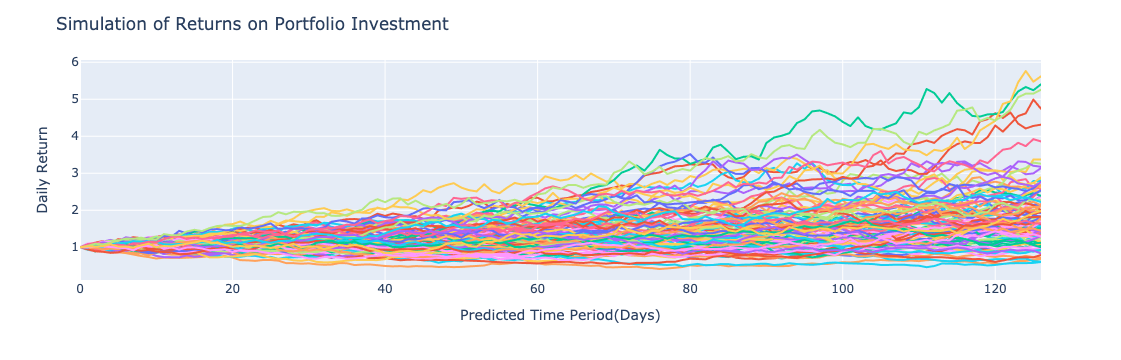

In [128]:
fig1 = px.line(mc_df)
fig1 = fig1.update_layout(
    xaxis_title="Predicted Time Period(Days)",
    yaxis_title="Daily Return",
    showlegend=False,
    title='Simulation of Returns on Portfolio Investment')
fig1

In [129]:
#use dataframe of stats for daily returns of simulation from aarons part as well
mc_path = Path("mc_stats.csv")
df_simulated_returns = pd.read_csv(mc_path, index_col=[0])
df_simulated_returns.index.name="Days"
df_simulated_returns


,mean,median,min,max
Days,,,,
0,1.000000,1.000000,1.000000,1.000000
1,1.011387,1.011400,0.930173,1.100253
2,1.012175,1.016254,0.882631,1.125290
3,1.025707,1.014775,0.877494,1.166336
4,1.025046,1.025390,0.848917,1.199026
...,...,...,...,...
122,1.865860,1.619139,0.567961,4.948215
123,1.881160,1.636188,0.571112,5.456691
124,1.893301,1.645460,0.571657,5.762699


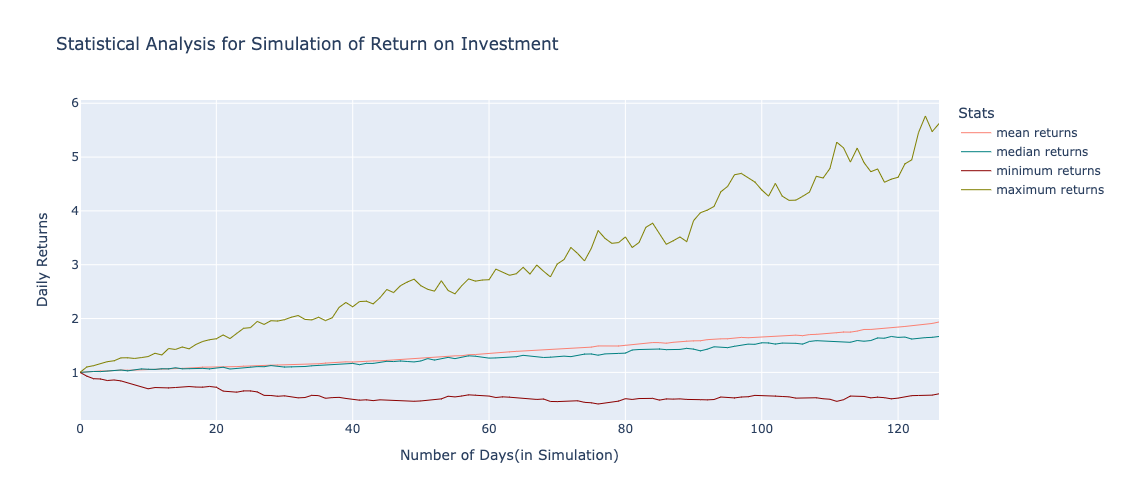

In [130]:

#plot simulated returns (this is in percent returns)

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig2.update_layout(
    height=500,
    width=1200,
    xaxis_title="Number of Days(in Simulation)",
    yaxis_title="Daily Returns",
    legend_title="Stats",
    title="Statistical Analysis for Simulation of Return on Investment")
fig2.show()

In [131]:
# Set initial investment
initial_investment = 11999

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
Days,,,,
0,11999.000000,11999.000000,11999.000000,11999.000000
1,12135.627120,12135.788105,11161.151724,13201.930810
2,12145.087891,12194.033515,10590.684682,13502.349589
3,12307.460774,12176.279872,10529.054805,13994.866373
4,12299.527351,12303.658222,10186.149934,14387.115971


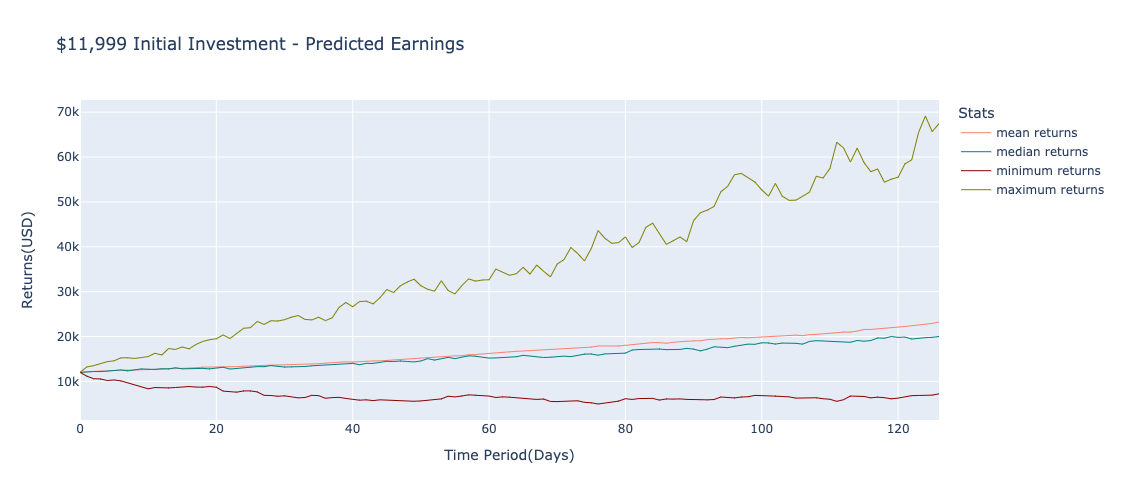

You've chosen to invest $11,900 in a diverse cryptocurrency portfolio!
This simulation can help you visualize what your portfolio may look like in the days following your initial investment.
Let's take a look at some other coins that are popularly traded right now.


In [132]:
#Plot simulated investment portfolio returns with initial investment number (values are in USD)
fig3 = go.Figure()
fig3 = fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig3 = fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig3 = fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig3 = fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig3 = fig3.update_layout(
    height=500,
    width=1200,
    xaxis_title="Time Period(Days)",
    yaxis_title="Returns(USD)",
    legend_title="Stats",
    title="$11,999 Initial Investment - Predicted Earnings")
fig3 = fig3.show()

print("You've chosen to invest $11,900 in a diverse cryptocurrency portfolio!")
print("This simulation can help you visualize what your portfolio may look like in the days following your initial investment.")
print("Let's take a look at some other coins that are popularly traded right now.")


In [9]:
# # define tickers list
# tickers=['COMPUSD','SUSHIUSD','LTCUSD','ETCUSD','DOGEUSD','STORJUSD','ADAUSD','BTCUSD','ETHUSD','SOLUSD','UNIUSD']

# #set variables
# my_crypto_portfolio = tickers
# df_daily = pd.DataFrame()
# exchange = 'COINBASE',

# #create for loop to append each ticker into dataframe
# for ticker in my_crypto_portfolio:
#     data = tv.get_hist(
#         symbol=ticker,
#         exchange=exchange,
#         interval=Interval.in_daily,n_bars=1000)
#     df_daily = df_daily.append(data)
    
    
# #adjust index from datetime to date to remove timestamp
# df_daily.index = pd.to_datetime(df_daily.index, errors='coerce').date

# #divide volume column by 1,000,000 to remove scientific notation in volume column
# #ONLY RUN THIS ONCE - has compounding affect on volume column
# df_daily['volume'] = (df_daily['volume'].astype(float)/1000).round(4).astype(float)
# df_daily.tail(10)


In [10]:
#DO NOT READ IN THIS DATAFRAME IF YOU GET ^ PREVIOUS CELL TO RUN & FETCH LIVE DATA
#read in COINBASE ticker dataframe
daily_path = Path("coinbase_tickers/daily_ohlc.csv")
df_daily = pd.read_csv(daily_path, index_col=[0])
df_daily.index.name = "Date"

#.loc COINBASE tickers Symbol, Open, High, Low, Close, Volume data as new df
comp_df = df_daily.loc[df_daily.symbol=='COINBASE:COMPUSD']
sushi_df = df_daily.loc[df_daily.symbol=='COINBASE:SUSHIUSD']
ltc_df = df_daily.loc[df_daily.symbol=='COINBASE:LTCUSD']
etc_df = df_daily.loc[df_daily.symbol=='COINBASE:ETCUSD']
doge_df = df_daily.loc[df_daily.symbol=='COINBASE:DOGEUSD']
storj_df = df_daily.loc[df_daily.symbol=='COINBASE:STORJUSD']
ada_df = df_daily.loc[df_daily.symbol=='COINBASE:ADAUSD']
btc_df = df_daily.loc[df_daily.symbol=='COINBASE:BTCUSD']
eth_df = df_daily.loc[df_daily.symbol=='COINBASE:ETHUSD']
sol_df = df_daily.loc[df_daily.symbol=='COINBASE:SOLUSD']
uni_df = df_daily.loc[df_daily.symbol=='COINBASE:UNIUSD']

#reset COINBASE ticker index to prep for plotting candlestick RSI
comp_df=comp_df.tail(60).reset_index()
sushi_df=sushi_df.tail(60).reset_index()
ltc_df=ltc_df.tail(60).reset_index()
etc_df=etc_df.tail(60).reset_index()
doge_df=doge_df.tail(60).reset_index()
storj_df=storj_df.tail(60).reset_index()
ada_df=ada_df.tail(60).reset_index()
btc_df=btc_df.tail(60).reset_index()
eth_df=eth_df.tail(60).reset_index()
sol_df=sol_df.tail(60).reset_index()
uni_df=uni_df.tail(60).reset_index()

In [109]:

print("When current price falls below the 'lower-bb' we can expect prices to begin to rise - this indicates a good BUY opportunity.") 
print("When current price raises above the 'upper-bb' we can expect prices to begin to fall soon - this presents an opportunity to SELL.")

# calculate sma and std for upper and lower bb for each df in df_list
df_list = [comp_df, sushi_df, ltc_df, etc_df, doge_df, storj_df, ada_df, btc_df, eth_df, sol_df, uni_df]
WINDOW=30

for df in df_list:
    df['sma'] = df['close'].rolling(WINDOW).mean()
    df['std'] = df['close'].rolling(WINDOW).std(ddof = 0)
    
    # Create subplots with 2 rows; top for candlestick price, and bottom for bar volume
    fig = make_subplots(rows = 2, cols = 1, shared_xaxes = True, subplot_titles = (f'{df.symbol[0]} Relative Strength Index', 'Volume(MM)'), vertical_spacing = 0.1, row_width = [.5, 1.4])

# Candlestick Plot
    fig.add_trace(go.Candlestick(x = df['Date'],
                                 open = df['open'],
                                 high = df['high'],
                                 low = df['low'],
                                 close = df['close'], showlegend=False,
                                 increasing_line_color= 'olive', decreasing_line_color= 'darkred',
                                 name = 'candlestick'),
                  row = 1, col = 1)

# Moving Average
    fig.add_trace(go.Scatter(x = df['Date'],
                             y = df['sma'],
                             line_color = 'black',
                             name = 'sma'),
                  row = 1, col = 1)
    
# Upper Bound
    fig.add_trace(go.Scatter(x = df['Date'],
                             y = df['sma'] + (df['std'] * 2),
                             line_color = 'tan',
                             line = {'dash': 'dash'},
                             name = 'upper band',
                             opacity = 0.5),
                  row = 1, col = 1) 
# Lower Bound fill in between with parameter 'fill': 'tonexty'
    fig.add_trace(go.Scatter(x = df['Date'],
                             y = df['sma'] - (df['std'] * 2),
                             line_color = 'tan',
                             line = {'dash': 'dash'},
                             fill = 'tonexty',
                             name = 'lower band',
                             opacity = 0.5),
                  row = 1, col = 1)

# Labels & Titles
    fig.update_layout(
        height=500,
        width=1200,
        xaxis_title=None,
        yaxis_title="Price",
        legend_title="Indicators",
        )
# ----------------

# Volume Plot
    fig.add_trace(go.Bar(x = df['Date'], y = df['volume'], showlegend=False), 
              row = 2, col = 1)
# Remove range slider; (short time frame)
    fig.update(layout_xaxis_rangeslider_visible=False)


    #fig.show();
    
   


When current price falls below the 'lower-bb' we can expect prices to begin to rise - this indicates a good BUY opportunity.
When current price raises above the 'upper-bb' we can expect prices to begin to fall soon - this presents an opportunity to SELL.


In [110]:
#candlestick charts
df_list = [comp_df, sushi_df, ltc_df, etc_df, doge_df, storj_df, ada_df, btc_df, eth_df, sol_df, uni_df]
for df in df_list:
    fig = go.Figure(
    data=[
        go.Candlestick(x=df['Date'],
                       open=df['open'],
                       high=df['high'],
                       low=df['low'],
                       close=df['close'],
                       increasing_line_color= 'olive', decreasing_line_color= 'darkred')
        
    ])
    fig.update(layout_xaxis_rangeslider_visible=False)
    fig.update_layout(
        height=500,
        width=1200,
        title=f'{df.symbol[0]} Daily Price',
        xaxis_title='Date',
        yaxis_title='Daily Price')
    #fig.show()


In [57]:
# dashboard.servable(dashboard)

Column(width=1200)
    [0] Row()
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Plotly(Figure, viewport={'xaxis.range': ['1951-01-...})
        [1] Column
            [0] Markdown(str)
            [1] Column
                [0] Markdown(str)
                [1] Column
                    [0] Markdown(str)
                    [1] Column
                        [0] Markdown(str)
                        [1] Column
                            [0] Markdown(str)
                            [1] Column
                                [0] Markdown(str)
                                [1] Plotly(Figure, relayout_data={'dragmode': 'lasso'}, selected_data={'points': [{'curveNumber'...}, viewport={'xaxis.range': ['1951-01-...}, visible=False)
                        [2] Markdown(str, width=600)

In [112]:
# mcsftool plot simulation (120)
fig1 = px.line(mc_df)
fig1 = fig1.update_layout(
    xaxis_title="Predicted Time Period(Days)",
    yaxis_title="Daily Return",
    showlegend=False,
    title='Simulation of Returns on Portfolio Investment')



In [113]:
#stat plot 
fig2 = go.Figure()
fig2 = fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig2 =fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig2 =fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig2 =fig2.add_trace(go.Scatter(x=df_simulated_returns.index, y=df_simulated_returns['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig2 =fig2.update_layout(
    height=500,
    width=1200,
    xaxis_title="Number of Days(in Simulation)",
    yaxis_title="Daily Returns",
    legend_title="Stats",
    title="Statistical Analysis for Simulation of Return on Investment")

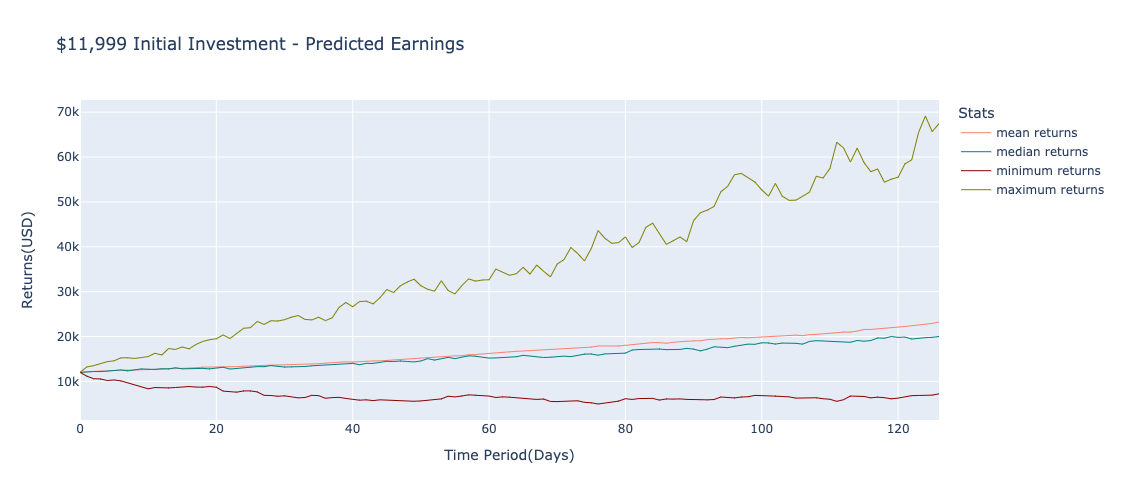

In [139]:
#Plot simulated investment portfolio returns with initial investment number (values are in USD)
fig3 = go.Figure()
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['mean'],
                    mode='lines',
                    name='mean returns',
                    line=dict(color="salmon", width=1),))
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['median'],
                    mode='lines',
                    name='median returns',
                    line=dict(color="teal", width=1),))
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['min'],
                    mode='lines',
                    name='minimum returns',
                    line=dict(color="darkred", width=1),))
fig3 =fig3.add_trace(go.Scatter(x=cumulative_pnl.index, y=cumulative_pnl['max'],
                    mode='lines',
                    name='maximum returns',
                    line=dict(color="olive", width=1),))
fig3 =fig3.update_layout(
    height=500,
    width=1200,
    xaxis_title="Time Period(Days)",
    yaxis_title="Returns(USD)",
    legend_title="Stats",
    title="$11,999 Initial Investment - Predicted Earnings")
fig3

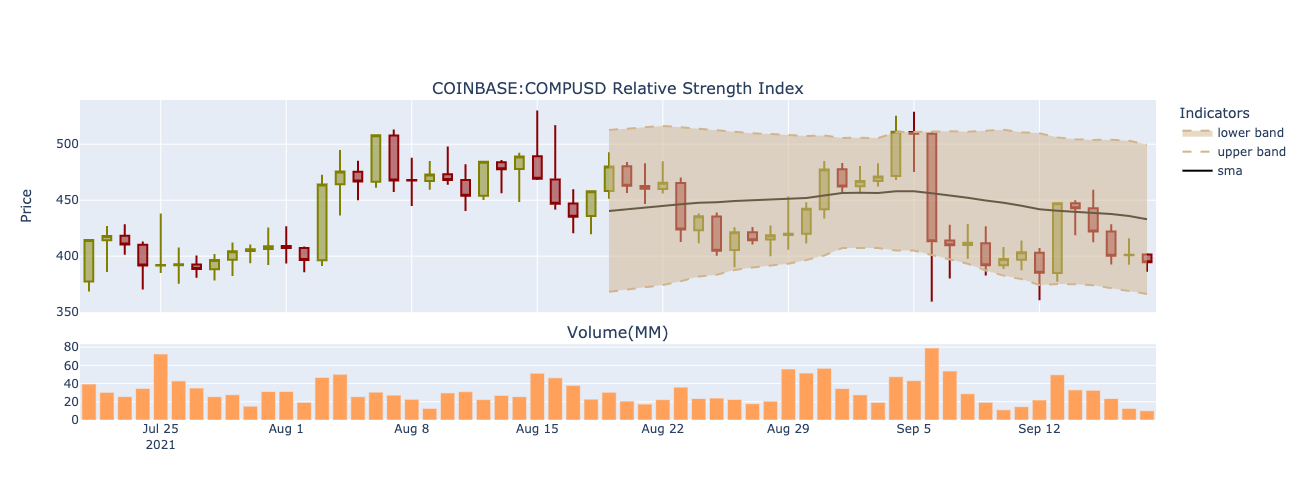

In [149]:
#RSI single

df_list = [comp_df, sushi_df, ltc_df, etc_df, doge_df, storj_df, ada_df, btc_df, eth_df, sol_df, uni_df]
df=df_list[0]

WINDOW=30
df['sma'] = df['close'].rolling(WINDOW).mean()
df['std'] = df['close'].rolling(WINDOW).std(ddof = 0)

fig5= fig5 = make_subplots(rows = 2, cols = 1, shared_xaxes = True, subplot_titles = (f'{df.symbol[0]} Relative Strength Index', 'Volume(MM)'), vertical_spacing = 0.1, row_width = [.5, 1.4])
fig5=fig5.add_trace(go.Candlestick(x = df['Date'],
                             open = df['open'],
                             high = df['high'],
                             low = df['low'],
                             close = df['close'], showlegend=False,
                             increasing_line_color= 'olive', decreasing_line_color= 'darkred',
                             name = 'candlestick'),
              row = 1, col = 1)
fig5=fig5.add_trace(go.Scatter(x = df['Date'],
                         y = df['sma'],
                         line_color = 'black',
                         name = 'sma'),
              row = 1, col = 1)
fig5=fig5.add_trace(go.Scatter(x = df['Date'],
                         y = df['sma'] + (df['std'] * 2),
                         line_color = 'tan',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1) 
fig5=fig5.add_trace(go.Scatter(x = df['Date'],
                         y = df['sma'] - (df['std'] * 2),
                         line_color = 'tan',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.5),
              row = 1, col = 1)
fig5=fig5.update_layout(
    height=500,
    width=1200,
    xaxis_title=None,
    yaxis_title="Price",
    legend_title="Indicators",
    )
fig5=fig5.add_trace(go.Bar(x = df['Date'], y = df['volume'], showlegend=False), 
          row = 2, col = 1)
fig5=fig5.update(layout_xaxis_rangeslider_visible=False)
fig5


In [140]:
monte_column = pn.Column("## Monte Carlo Simulations", fig1)

In [141]:
return_stats = pn.Column("##Return Stats", fig2)

In [142]:
investment_sim = pn.Column("## Investment Predictions", fig3)

In [ ]:
rsi_charts = pn.Column("## Relative Strength Index", fig4)

In [144]:
simulations = pn.Tabs(
    (
        "Monte Carlo Simulations",
        fig1
    ),
    (
        "Return Stats",
        fig2
    ),
    (
        "Investment Predictions",
        fig3
    )
)
#simulations

In [145]:
dashboard = pn.Tabs(
    ("Predicted Earnings",monte_column),
    ( "Return Stats",return_stats),
    ("Investment Predictions",fig3)
)

In [146]:
pn.serve(dashboard)

Launching server at http://localhost:63313
